## Data Loading

Dataset not pushed to github bcus of its size, the dataset can be found in - https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd

# import package
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read dataset
data_df = pd.read_csv("household_power_consumption.txt", 
                   sep=';', # To tell that the data is seperated by ;
                   parse_dates={'Timestamp' : ['Date', 'Time']}, infer_datetime_format=True, 
                   low_memory=False, na_values=['nan','?']
                     )
data_df.head(10)

,Timestamp,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16 17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16 17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,2006-12-16 17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,2006-12-16 17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,2006-12-16 17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


# Data Exploratory (Exploratory Data Analysis - EDA)

In [3]:
# data info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Timestamp              datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [4]:
# total data
data_df.shape

(2075259, 8)

In [5]:
# This database have 2,075,259 rows and 7 columns. 


#Let's check the NaN data.
data_df.isnull().sum()

Timestamp                    0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [6]:
# Generate descriptive statistics.
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

data_df.describe()

,Timestamp,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,2008-12-06 07:12:59.999994112,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
min,2006-12-16 17:24:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-12 00:18:30,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-12-06 07:13:00,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-12-01 14:07:30,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 21:02:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00


In [7]:
# From above, describe seems not to give what we wanted, lew lets see for 3 decimal places
pd.options.display.float_format = "{:.3f}".format
data_df.describe()

,Timestamp,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2049280.000,2049280.000,2049280.000,2049280.000,2049280.000,2049280.000,2049280.000
mean,2008-12-06 07:12:59.999994112,1.092,0.124,240.840,4.628,1.122,1.299,6.458
min,2006-12-16 17:24:00,0.076,0.000,223.200,0.200,0.000,0.000,0.000
25%,2007-12-12 00:18:30,0.308,0.048,238.990,1.400,0.000,0.000,0.000
50%,2008-12-06 07:13:00,0.602,0.100,241.010,2.600,0.000,0.000,1.000
75%,2009-12-01 14:07:30,1.528,0.194,242.890,6.400,0.000,1.000,17.000
max,2010-11-26 21:02:00,11.122,1.390,254.150,48.400,88.000,80.000,31.000
std,NaN,1.057,0.113,3.240,4.444,6.153,5.822,8.437


In [8]:
data_df = data_df.fillna(data_df.mean())

In [9]:
data_df.isnull().sum()

Timestamp                0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [10]:
# Create 'active_energy' feature
data_df['active_energy'] = data_df['Global_active_power'] * 1000 / 60 - data_df['Sub_metering_1'] - data_df['Sub_metering_2'] - data_df['Sub_metering_3']

# Extract datetime features
data_df['day_of_week'] = data_df['Timestamp'].dt.dayofweek
data_df['month'] = data_df['Timestamp'].dt.month
data_df['hour'] = data_df['Timestamp'].dt.hour

data_df

,Timestamp,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_energy,day_of_week,month,hour
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000,52.267,5,12,17
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000,72.333,5,12,17
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000,70.567,5,12,17
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000,71.800,5,12,17
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000,43.100,5,12,17
...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.000,15.767,4,11,20
2075255,2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.000,15.733,4,11,20
2075256,2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.000,15.633,4,11,21
2075257,2010-11-26 21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.000,15.567,4,11,21


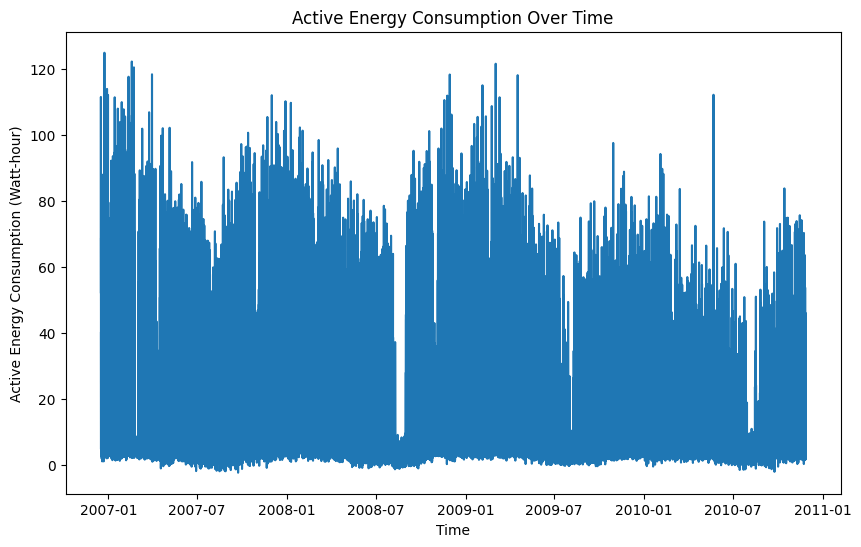

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(data_df['Timestamp'], data_df['active_energy'])
plt.title('Active Energy Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Active Energy Consumption (Watt-hour)')
plt.show()


## FOR SECOND INSTRUCTION - FOR QUESTION 14-16

In [12]:
# Resample to daily and sum values
df_daily = data_df.resample('D', on='Timestamp').sum().reset_index()

In [13]:
# Split data into train and test sets
train_size = len(df_daily) - 300
train_daily, test_daily = df_daily[:train_size], df_daily[train_size:]

In [14]:
from prophet import Prophet
# Prepare data for Prophet
prophet_data = train_daily.rename(columns={'Timestamp': 'ds', 'Global_active_power': 'y'})


Importing plotly failed. Interactive plots will not work.


In [15]:
# Instantiate Prophet model
model = Prophet()

# Fit the model on the training data
model.fit(prophet_data)


22:48:34 - cmdstanpy - INFO - Chain [1] start processing
22:48:34 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=300)  # 300 days for the test set


In [17]:
# Generate predictions for the future dates
forecast = model.predict(future)


In [18]:
# Generate predictions for the future dates
forecast = model.predict(future)


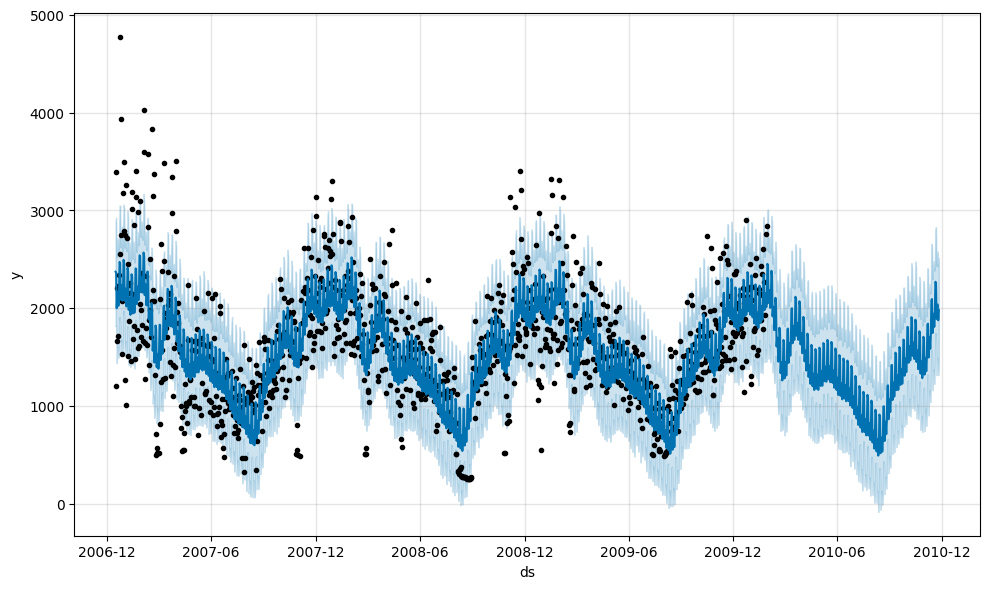

In [19]:
# Visualize the forecast
fig = model.plot(forecast)


In [20]:

from sklearn.metrics import mean_absolute_error
# Calculate MAE
y_true = test_daily['Global_active_power']
y_pred = forecast.tail(300)['yhat']
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')


Mean Absolute Error (MAE): 282.72253953906096


## FOR THIRD INSTRUCTION - FOR QUESTION 17 - 20

In [21]:
data_df

,Timestamp,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,active_energy,day_of_week,month,hour
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000,52.267,5,12,17
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000,72.333,5,12,17
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000,70.567,5,12,17
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000,71.800,5,12,17
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000,43.100,5,12,17
...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26 20:58:00,0.946,0.000,240.430,4.000,0.000,0.000,0.000,15.767,4,11,20
2075255,2010-11-26 20:59:00,0.944,0.000,240.000,4.000,0.000,0.000,0.000,15.733,4,11,20
2075256,2010-11-26 21:00:00,0.938,0.000,239.820,3.800,0.000,0.000,0.000,15.633,4,11,21
2075257,2010-11-26 21:01:00,0.934,0.000,239.700,3.800,0.000,0.000,0.000,15.567,4,11,21


In [22]:
# Resample Data to Daily Sampling Rate and Split into Train and Test
df_daily = data_df.resample('D', on='Timestamp').sum().reset_index()


In [23]:
# Split data into train and test sets
train_size = len(df_daily) - 300
train_daily, test_daily = df_daily[:train_size], df_daily[train_size:]

In [24]:
# Prepare data for multivariate Prophet
train_prophet_multi = train_daily.rename(columns={'Timestamp': 'ds', 'Global_active_power': 'y'})
train_prophet_multi['add1'] = train_daily['Global_reactive_power']
train_prophet_multi['add2'] = train_daily['Voltage']
train_prophet_multi['add3'] = train_daily['Global_intensity']
train_prophet_multi['add4'] = train_daily['Sub_metering_1']
train_prophet_multi['add5'] = train_daily['Sub_metering_2']
train_prophet_multi['add6'] = train_daily['Sub_metering_3']

In [25]:
# Instantiate multivariate Prophet model
model_multi = Prophet()

# Add additional regressors
model_multi.add_regressor('add1')
model_multi.add_regressor('add2')
model_multi.add_regressor('add3')
model_multi.add_regressor('add4')
model_multi.add_regressor('add5')
model_multi.add_regressor('add6')

# Fit the model on the training data
model_multi.fit(train_prophet_multi)


22:48:40 - cmdstanpy - INFO - Chain [1] start processing
22:48:41 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
# Prepare future dataframe with regressors for prediction
future_multi = pd.DataFrame(test_daily['Timestamp'])
future_multi['add1'] = test_daily['Global_reactive_power'].values
future_multi['add2'] = test_daily['Voltage'].values
future_multi['add3'] = test_daily['Global_intensity'].values
future_multi['add4'] = test_daily['Sub_metering_1'].values
future_multi['add5'] = test_daily['Sub_metering_2'].values
future_multi['add6'] = test_daily['Sub_metering_3'].values


In [27]:
# Convert 'datetime' column to datetime format
future_multi['Timestamp'] = pd.to_datetime(future_multi['Timestamp'])

# Rename 'datetime' to 'ds'
future_multi.rename(columns={'Timestamp': 'ds'}, inplace=True)

# Generate predictions for the future dates
forecast_multi = model_multi.predict(future_multi)



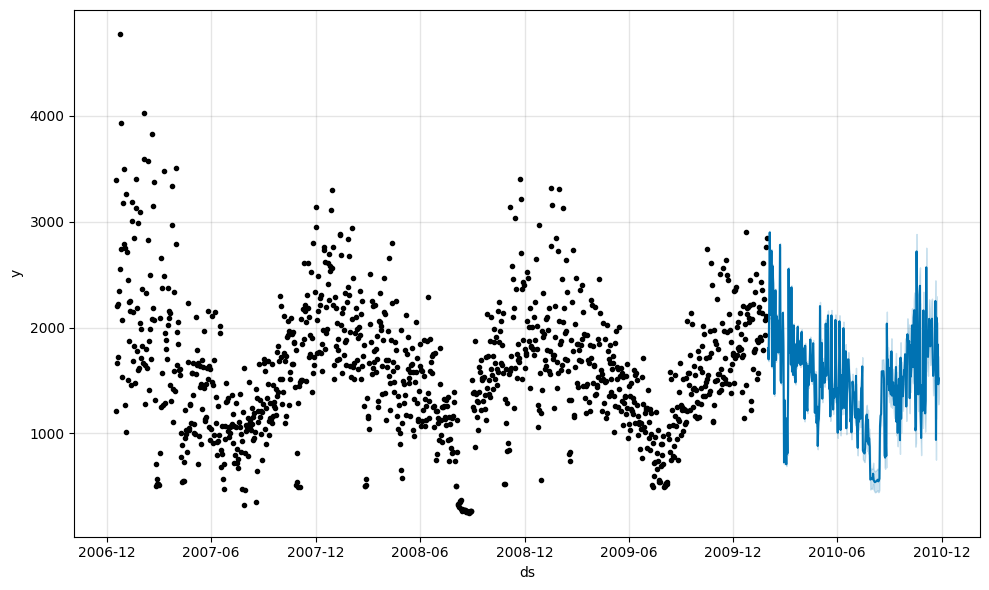

In [28]:
# Visualize the forecast
fig_multi = model_multi.plot(forecast_multi)


In [29]:
# Calculate MAE for the multivariate model
y_true_multi = test_daily['Global_active_power']
y_pred_multi = forecast_multi['yhat']
mae_multi = mean_absolute_error(y_true_multi, y_pred_multi)
print(f'Mean Absolute Error (MAE) for Multivariate Model: {mae_multi}')


Mean Absolute Error (MAE) for Multivariate Model: 19.96724480173718
